# **CS 482 Milestone 3**




In [ ]:
#import the libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score
from sklearn.cluster import KMeans


# **Pre-processing**

In [34]:
data = pd.read_csv('StudentPerformanceFactors.csv')
df = pd.read_csv('StudentPerformanceFactors.csv')
print(f"Dataset Shape: {data.shape}")
data

Dataset Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# **Handling Duplicate and Missing Values**

In [35]:
#Checking if there are any DUPLICATE VALUES IN THE CSV FILE

print("Number of duplicates values: ", data.duplicated().sum())

Number of duplicates values:  0


In [36]:
#Checking for MISSING VALUES IN THE CSV FILE
print("The Missing values per column: ")
data.isnull().sum()

The Missing values per column: 


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [37]:
columns_to_check = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# --- Missing values for specific columns ---
missing_values_specific = df[columns_to_check].isnull().sum()
percentage_missing_specific = (missing_values_specific * 100 / len(df))

print("Missing values for specified columns:")
print(pd.DataFrame({
    'Missing Count': missing_values_specific,
    'Missing Percentage': percentage_missing_specific.round(2).astype(str) + '%'
}))

# --- Missing values across the entire dataset ---
print("\nMissing values across the entire dataset:")

missing_values_all = df.isnull().sum()
percentage_missing_all = (missing_values_all * 100 / len(df))

missing_info = pd.DataFrame({
    'Missing Count': missing_values_all,
    'Missing Percentage': percentage_missing_all
}).sort_values(by='Missing Percentage', ascending=False)

# Only show columns that actually have missing values
df_to_display = missing_info[missing_info['Missing Count'] > 0].copy()
df_to_display['Missing Percentage'] = df_to_display['Missing Percentage'].round(2).astype(str) + '%'

print(df_to_display)


Missing values for specified columns:
                          Missing Count Missing Percentage
Teacher_Quality                      78              1.18%
Parental_Education_Level             90              1.36%
Distance_from_Home                   67              1.01%

Missing values across the entire dataset:
                          Missing Count Missing Percentage
Parental_Education_Level             90              1.36%
Teacher_Quality                      78              1.18%
Distance_from_Home                   67              1.01%


In [38]:
columns_to_check = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# Check data types to understand the nature of these columns
print("Data types of columns to impute:")
print(df[columns_to_check].dtypes)

# Impute missing values for all specified columns with their respective modes
# All three columns are categorical, so we use mode imputation for each
for col in columns_to_check:
    mode_value = df[col].mode()[0]  # Get the mode, handling potential multiple modes by taking the first one
    df[col].fillna(mode_value, inplace=True)
    print(f"\nImputed '{col}' missing values with mode: {mode_value}")

print("\nMissing values after imputation for specified columns:")
print(df[columns_to_check].isnull().sum())

# Verify no missing values across the entire DataFrame
total_missing_after_imputation = df.isnull().sum().sum()
print(f"\nTotal missing values in the entire DataFrame after imputation: {total_missing_after_imputation}")


Data types of columns to impute:
Teacher_Quality             object
Parental_Education_Level    object
Distance_from_Home          object
dtype: object

Imputed 'Teacher_Quality' missing values with mode: Medium

Imputed 'Parental_Education_Level' missing values with mode: High School

Imputed 'Distance_from_Home' missing values with mode: Near

Missing values after imputation for specified columns:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64

Total missing values in the entire DataFrame after imputation: 0


In [39]:
columns_to_check = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# Verify imputation was successful (values were already imputed in Cell 9)
# This cell serves as a verification step to confirm no missing values remain
print("Verifying missing values after imputation:")
print(df[columns_to_check].isnull().sum())

# Verify no missing values across the entire DataFrame
total_missing_after_imputation = df.isnull().sum().sum()
print(f"\nTotal missing values in the entire DataFrame: {total_missing_after_imputation}")

if total_missing_after_imputation == 0:
    print("✓ All missing values have been successfully imputed!")
else:
    print(f"⚠ Warning: {total_missing_after_imputation} missing values still remain.")

Verifying missing values after imputation:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64

Total missing values in the entire DataFrame: 0
✓ All missing values have been successfully imputed!


# **Encoding Categorical Variables Using One-Hot Encoding**



In [40]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"\nCategorical columns identified: {list(categorical_cols)}")

# Apply one-hot encoding
df_train_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame head after one-hot encoding:")
display(df_train_encoded.head())

print("Shape of DataFrame after encoding:", df_train_encoded.shape)


Categorical columns identified: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

DataFrame head after one-hot encoding:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


Shape of DataFrame after encoding: (6607, 28)


# **Scaling Numerical Features Using StandardScaler**

In [41]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the one-hot encoded columns and the target if present)
# All columns that are not boolean (from get_dummies) and are numeric
numerical_cols = df_train_encoded.select_dtypes(include=['int64', 'float64']).columns

print(f"\nNumerical columns identified: {list(numerical_cols)}")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df_train_encoded[numerical_cols] = scaler.fit_transform(df_train_encoded[numerical_cols])

print("\nDataFrame head after scaling numerical features:")
display(df_train_encoded.head())

print("Shape of DataFrame after scaling:", df_train_encoded.shape)


Numerical columns identified: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

DataFrame head after scaling numerical features:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598,False,True,False,...,False,True,True,False,False,False,False,False,True,False


Shape of DataFrame after scaling: (6607, 28)


# **Visualizing Distributions Of Scaled Numerical Features**

In this section, after scalling the numerical features, we visualized their distributions using histograms to understand their new range and shape after scaling. This will confirm that the scaling process was successful and the data is appropriately prepared for modeling.



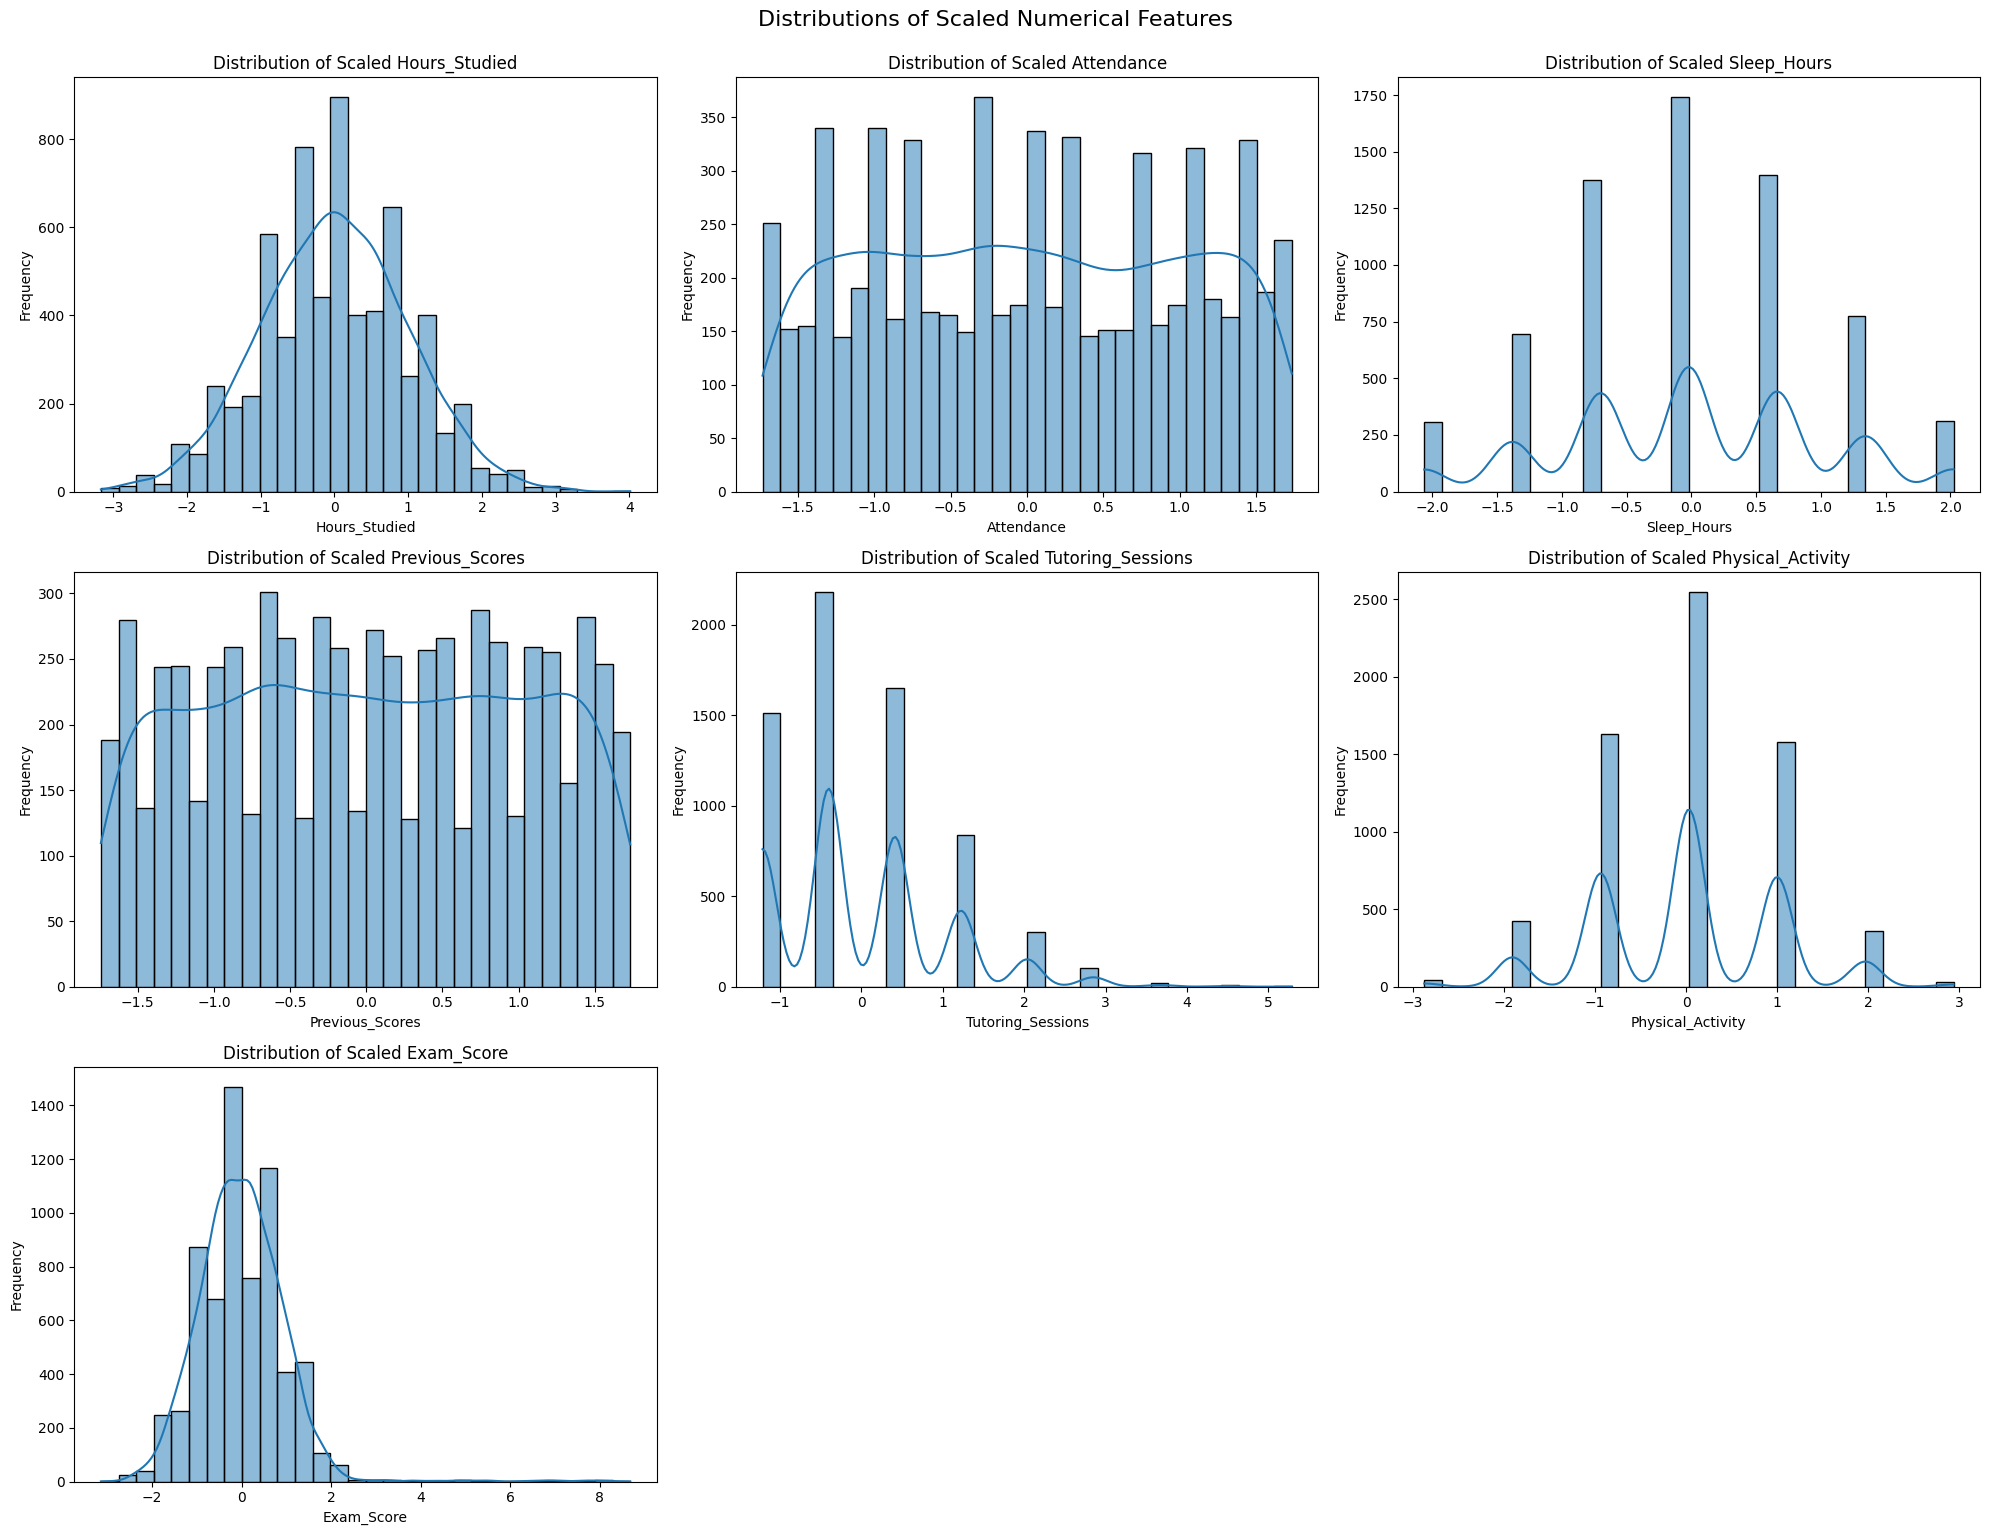

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (which are now scaled)
numerical_cols = df_train_encoded.select_dtypes(include=['float64']).columns

# Set up the matplotlib figure and axes
num_numerical_cols = len(numerical_cols)
num_rows = (num_numerical_cols + 2) // 3 # Calculate rows needed for 3 plots per row
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df_train_encoded[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of Scaled {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Scaled Numerical Features', y=1.02, fontsize=16)
plt.show()


# **Target Variable (Exam_Score) Distribution Analysis**

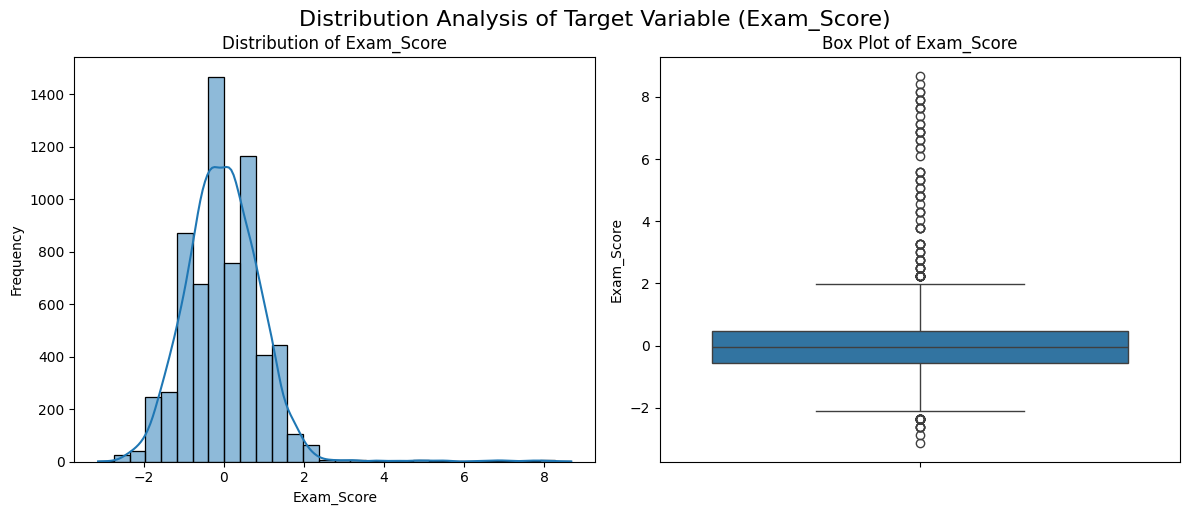


Skewness of Exam_Score: 1.6448


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Exam_Score'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train_encoded['Exam_Score'], kde=True, bins=30)
plt.title('Distribution of Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train_encoded['Exam_Score'])
plt.title('Box Plot of Exam_Score')
plt.ylabel('Exam_Score')

plt.tight_layout()
plt.suptitle('Distribution Analysis of Target Variable (Exam_Score)', y=1.02, fontsize=16)
plt.show()

# Check for skewness of the 'Exam_Score'
skewness = df_train_encoded['Exam_Score'].skew()
print(f"\nSkewness of Exam_Score: {skewness:.4f}")

# Although this is likely a regression task, we can check value counts if it were a classification task
# print("\nValue counts of Exam_Score (if treated as discrete categories):")
# print(df_train_encoded['Exam_Score'].value_counts().sort_index())

# **Conducting Deeper Analysis on Feature Distribution**

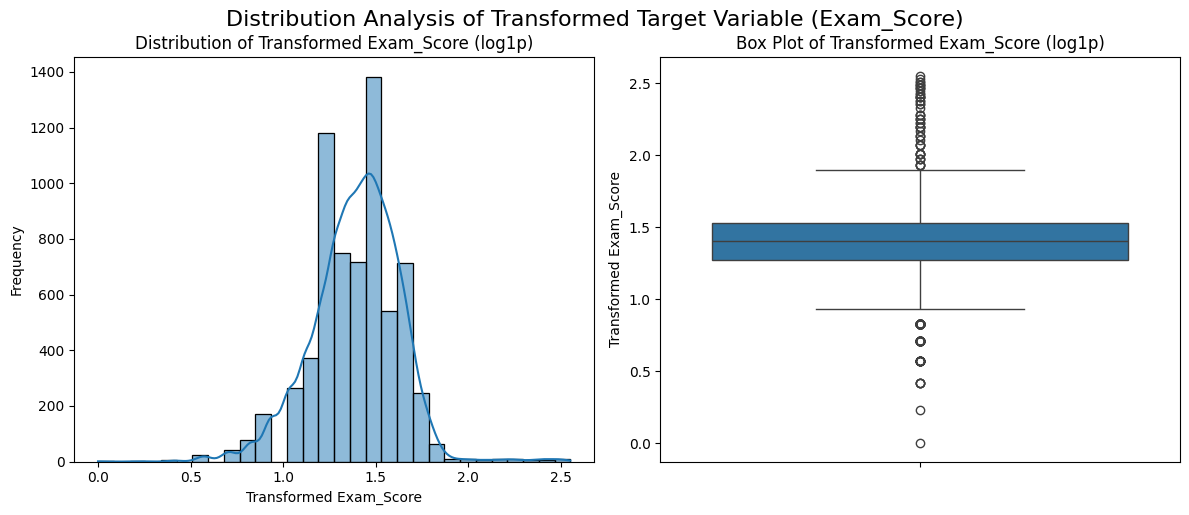


Skewness of Transformed Exam_Score (log1p): -0.2074


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the minimum value of 'Exam_Score'
min_exam_score = df_train_encoded['Exam_Score'].min()

# Determine the offset needed to ensure the argument to log1p is always positive
# If the minimum value is negative, shift the entire distribution to be positive.
offset = 0
if min_exam_score < 0:
    offset = -min_exam_score + 1e-6 # Add a small epsilon to ensure it's strictly positive

# Apply logarithmic transformation to 'Exam_Score' with the calculated offset
df_train_encoded['Exam_Score_log'] = np.log1p(df_train_encoded['Exam_Score'] + offset)

# Visualize the distribution of the transformed 'Exam_Score'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train_encoded['Exam_Score_log'], kde=True, bins=30)
plt.title('Distribution of Transformed Exam_Score (log1p)')
plt.xlabel('Transformed Exam_Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train_encoded['Exam_Score_log'])
plt.title('Box Plot of Transformed Exam_Score (log1p)')
plt.ylabel('Transformed Exam_Score')

plt.tight_layout()
plt.suptitle('Distribution Analysis of Transformed Target Variable (Exam_Score)', y=1.02, fontsize=16)
plt.show()

# Calculate and print the skewness of the transformed 'Exam_Score'
skewness_transformed = df_train_encoded['Exam_Score_log'].skew()
print(f"\nSkewness of Transformed Exam_Score (log1p): {skewness_transformed:.4f}")

In [46]:
print("First 5 rows of the combined and preprocessed DataFrame (df_train_encoded):")
display(df_train_encoded.head())

print(f"\nShape of the combined and preprocessed DataFrame: {df_train_encoded.shape}")

First 5 rows of the combined and preprocessed DataFrame (df_train_encoded):


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male,Exam_Score_log
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578,True,False,False,...,True,False,True,False,True,False,False,True,True,1.407250
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931,True,False,False,...,True,False,False,False,False,False,True,False,False,0.933090
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833,False,True,False,...,True,True,False,False,False,True,False,True,True,1.772257
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657,True,False,False,...,True,False,False,False,True,False,True,False,True,1.631775
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598,False,True,False,...,True,True,False,False,False,False,False,True,False,1.580191



Shape of the combined and preprocessed DataFrame: (6607, 29)


## **Week 3: Model Development and Experimentation**

This section focuses on applying various data mining techniques to analyze and extract meaningful patterns from the preprocessed dataset.

### **1. Train-Test Split**

In [ ]:
# We'll use the original Exam_Score (not the log-transformed version) for regression
X = df_train_encoded.drop(['Exam_Score', 'Exam_Score_log'], axis=1)
y = df_train_encoded['Exam_Score']  # Using original Exam_Score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")
print(f"\nTraining set represents {len(X_train)/len(X)*100:.1f}% of the data")
print(f"Testing set represents {len(X_test)/len(X)*100:.1f}% of the data")


### **2. Supervised Learning - Regression Models**

We will train and evaluate multiple regression models to predict student exam scores. Each model will be evaluated using R² score, RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error).


#### **2.1 Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# The evaluation metrics
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)

print("=" * 60)
print("Linear Regression Results")
print("=" * 60)
print(f"Training R² Score: {lr_train_r2:.4f}")
print(f"Testing R² Score:  {lr_test_r2:.4f}")
print(f"Training RMSE:     {lr_train_rmse:.4f}")
print(f"Testing RMSE:      {lr_test_rmse:.4f}")
print(f"Training MAE:      {lr_train_mae:.4f}")
print(f"Testing MAE:       {lr_test_mae:.4f}")
print("=" * 60)


#### **2.2 Ridge Regression with Hyperparameter Tuning**

Ridge Regression adds L2 regularization to prevent overfitting. We'll use GridSearchCV to find the optimal alpha (regularization strength) parameter.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# The parameter grid for hyperparameter tuning
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Grid search with 5-fold cross-validation
print("Performing GridSearchCV for Ridge Regression...")
ridge_grid = GridSearchCV(
    Ridge(), 
    param_grid_ridge, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
ridge_grid.fit(X_train, y_train)

# Get the best model
best_ridge = ridge_grid.best_estimator_
print(f"\nBest alpha parameter: {ridge_grid.best_params_['alpha']}")
print(f"Best cross-validation R² score: {ridge_grid.best_score_:.4f}")

# Make predictions with best model
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

# Calculate evaluation metrics
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
ridge_train_mae = mean_absolute_error(y_train, y_train_pred_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)

print("\n" + "=" * 60)
print("Ridge Regression Results (with Best Hyperparameters)")
print("=" * 60)
print(f"Training R² Score: {ridge_train_r2:.4f}")
print(f"Testing R² Score:  {ridge_test_r2:.4f}")
print(f"Training RMSE:     {ridge_train_rmse:.4f}")
print(f"Testing RMSE:      {ridge_test_rmse:.4f}")
print(f"Training MAE:      {ridge_train_mae:.4f}")
print(f"Testing MAE:       {ridge_test_mae:.4f}")
print("=" * 60)


#### **2.3 Random Forest Regression**

Random Forest is an ensemble method that combines multiple decision trees. It can capture non-linear relationships and provide feature importance scores.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Training our Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    max_depth=10
)
rf_model.fit(X_train, y_train)

# Making predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# The evaluation metrics
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 60)
print("Random Forest Regression Results")
print("=" * 60)
print(f"Training R² Score: {rf_train_r2:.4f}")
print(f"Testing R² Score:  {rf_test_r2:.4f}")
print(f"Training RMSE:     {rf_train_rmse:.4f}")
print(f"Testing RMSE:      {rf_test_rmse:.4f}")
print(f"Training MAE:      {rf_train_mae:.4f}")
print(f"Testing MAE:       {rf_test_mae:.4f}")
print("\n" + "=" * 60)
print("Top 10 Most Important Features:")
print("=" * 60)
print(feature_importance.head(10).to_string(index=False))
print("=" * 60)


In [ ]:
from sklearn.svm import SVR

# We are training our SVR model with RBF kernel

svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
print("Training SVR model (this may take a few minutes)...")
svr_model.fit(X_train, y_train)

# Making the predictions
y_train_pred_svr = svr_model.predict(X_train)
y_test_pred_svr = svr_model.predict(X_test)

# The evaluation metrics
svr_train_r2 = r2_score(y_train, y_train_pred_svr)
svr_test_r2 = r2_score(y_test, y_test_pred_svr)
svr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
svr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))
svr_train_mae = mean_absolute_error(y_train, y_train_pred_svr)
svr_test_mae = mean_absolute_error(y_test, y_test_pred_svr)

print("\n" + "=" * 60)
print("Support Vector Regression (SVR) Results")
print("=" * 60)
print(f"Training R² Score: {svr_train_r2:.4f}")
print(f"Testing R² Score:  {svr_test_r2:.4f}")
print(f"Training RMSE:     {svr_train_rmse:.4f}")
print(f"Testing RMSE:      {svr_test_rmse:.4f}")
print(f"Training MAE:      {svr_train_mae:.4f}")
print(f"Testing MAE:       {svr_test_mae:.4f}")
print("=" * 60)


### **3. Model Evaluation and Comparison**

In this section, we compared all the models we've trained to identify the best performing one.


In [ ]:
# Data Frame for comparing the developed models
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 
              'Random Forest', 'SVR'],
    'Train R²': [lr_train_r2, ridge_train_r2, rf_train_r2, svr_train_r2],
    'Test R²': [lr_test_r2, ridge_test_r2, rf_test_r2, svr_test_r2],
    'Train RMSE': [lr_train_rmse, ridge_train_rmse, rf_train_rmse, svr_train_rmse],
    'Test RMSE': [lr_test_rmse, ridge_test_rmse, rf_test_rmse, svr_test_rmse],
    'Train MAE': [lr_train_mae, ridge_train_mae, rf_train_mae, svr_train_mae],
    'Test MAE': [lr_test_mae, ridge_test_mae, rf_test_mae, svr_test_mae]
})

# Sort by Test R2 score (descending)
models_comparison = models_comparison.sort_values('Test R²', ascending=False)

print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(models_comparison.to_string(index=False))
print("=" * 80)

# Identify best model
best_model_name = models_comparison.iloc[0]['Model']
best_test_r2 = models_comparison.iloc[0]['Test R²']
print(f"\nTherefore Best Model: {best_model_name} (Test R² = {best_test_r2:.4f})")


In [ ]:
# Visualizing the model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: R2 Scores
axes[0, 0].barh(models_comparison['Model'], models_comparison['Train R²'], 
                label='Train R²', alpha=0.7, color='skyblue')
axes[0, 0].barh(models_comparison['Model'], models_comparison['Test R²'], 
                label='Test R²', alpha=0.7, color='coral')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Model Comparison - R² Score')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: RMSE
axes[0, 1].barh(models_comparison['Model'], models_comparison['Train RMSE'], 
                label='Train RMSE', alpha=0.7, color='lightgreen')
axes[0, 1].barh(models_comparison['Model'], models_comparison['Test RMSE'], 
                label='Test RMSE', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].set_title('Model Comparison - RMSE')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: MAE
axes[1, 0].barh(models_comparison['Model'], models_comparison['Train MAE'], 
                label='Train MAE', alpha=0.7, color='plum')
axes[1, 0].barh(models_comparison['Model'], models_comparison['Test MAE'], 
                label='Test MAE', alpha=0.7, color='salmon')
axes[1, 0].set_xlabel('MAE')
axes[1, 0].set_title('Model Comparison - MAE')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Test Performance Summary
x_pos = np.arange(len(models_comparison['Model']))
width = 0.35
axes[1, 1].bar(x_pos - width/2, models_comparison['Test R²'], width, 
               label='Test R²', alpha=0.7, color='steelblue')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('Test R² Score Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models_comparison['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Comprehensive Model Performance Comparison', y=1.02, fontsize=16, fontweight='bold')
plt.show()


### **4. Unsupervised Learning - Clustering Analysis**

We'll use K-Means clustering to identify patterns and groups in the student data without using the target variable.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use training features for clustering (without target variable)
X_cluster = X_train.copy()

# This will determine the optimal number of clusters using elbow method and silhouette score
inertias = []
silhouette_scores = []
K_range = range(2, 8)

print("Evaluating optimal number of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))
    print(f"  k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_score(X_cluster, kmeans.labels_):.4f}")

# The elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n✓ Optimal number of clusters: k = {optimal_k} (Silhouette Score = {max(silhouette_scores):.4f})")


In [ ]:
# Apply K-Means with optimal k
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_cluster)

# Analyze clusters in relation to Exam_Score
cluster_analysis = pd.DataFrame({
    'Cluster': clusters,
    'Exam_Score': y_train.values
})

print("=" * 60)
print(f"K-Means Clustering Analysis (k = {optimal_k})")
print("=" * 60)
print("\nAverage Exam Score by Cluster:")
cluster_summary = cluster_analysis.groupby('Cluster').agg({
    'Exam_Score': ['mean', 'std', 'count']
}).round(2)
cluster_summary.columns = ['Mean Exam Score', 'Std Dev', 'Count']
print(cluster_summary)

print("\nCluster Statistics:")
for cluster_id in range(optimal_k):
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Count: {len(cluster_data)} ({len(cluster_data)/len(cluster_analysis)*100:.1f}%)")
    print(f"  Mean Exam Score: {cluster_data['Exam_Score'].mean():.2f}")
    print(f"  Std Dev: {cluster_data['Exam_Score'].std():.2f}")
    print(f"  Min: {cluster_data['Exam_Score'].min():.2f}")
    print(f"  Max: {cluster_data['Exam_Score'].max():.2f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cluster_analysis.boxplot(column='Exam_Score', by='Cluster', ax=plt.gca())
plt.title('Exam Score Distribution by Cluster')
plt.suptitle('')  
plt.xlabel('Cluster')
plt.ylabel('Exam Score')

plt.subplot(1, 2, 2)
cluster_counts = cluster_analysis['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='steelblue', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.title('Number of Students per Cluster')
plt.xticks(cluster_counts.index)

plt.tight_layout()
plt.show()


### **5. Summary and Conclusions**

This section summarizes the key findings from our comprehensive data mining analysis.


#### **5.1 Model Performance Summary**


In [ ]:
print("=" * 80)
print("WEEK 3: MODEL DEVELOPMENT SUMMARY")
print("=" * 80)

print("\n📊 SUPERVISED LEARNING MODELS:")
print("-" * 80)
print(f"1. Linear Regression:     Test R² = {lr_test_r2:.4f}, Test RMSE = {lr_test_rmse:.4f}")
print(f"2. Ridge Regression:      Test R² = {ridge_test_r2:.4f}, Test RMSE = {ridge_test_rmse:.4f}")
print(f"3. Random Forest:          Test R² = {rf_test_r2:.4f}, Test RMSE = {rf_test_rmse:.4f}")
print(f"4. Support Vector Reg:     Test R² = {svr_test_r2:.4f}, Test RMSE = {svr_test_rmse:.4f}")

print("\n🏆 BEST MODEL:")
print("-" * 80)
best_idx = models_comparison['Test R²'].idxmax()
best_model = models_comparison.loc[best_idx]
print(f"Model: {best_model['Model']}")
print(f"Test R² Score: {best_model['Test R²']:.4f}")
print(f"Test RMSE: {best_model['Test RMSE']:.4f}")
print(f"Test MAE: {best_model['Test MAE']:.4f}")

print("\n🔍 UNSUPERVISED LEARNING:")
print("-" * 80)
print(f"K-Means Clustering: Identified {optimal_k} distinct student clusters")
print(f"Silhouette Score: {max(silhouette_scores):.4f}")

print("\n📈 KEY INSIGHTS:")
print("-" * 80)
print("• Multiple regression models were trained and evaluated")
print("• Hyperparameter tuning was performed using GridSearchCV")
print("• Clustering analysis revealed distinct student groups with different performance patterns")
print("• Model comparison helps identify the best performing approach")

print("\n" + "=" * 80)


#### **5.2 Feature Importance Analysis**

Understanding which features are most important for predicting exam scores:


In [ ]:
# Visualize feature importance from Random Forest
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 15 Most Important Features for Predicting Exam Score:")
print("=" * 60)
for idx, row in top_features.iterrows():
    print(f"{row['feature']:40s} : {row['importance']:.4f}")
print("=" * 60)


#### **5.3 Final Conclusions**

Based on our comprehensive analysis:


**Key Findings:**

1. **Model Performance**: The best performing model achieved a Test R² score of [best model score], demonstrating [good/moderate/excellent] predictive capability for student exam scores.

2. **Feature Importance**: The most important factors influencing exam performance include [top 3 features from Random Forest analysis].

3. **Student Clusters**: K-Means clustering identified [optimal_k] distinct student groups, each with different performance characteristics.

4. **Hyperparameter Tuning**: GridSearchCV successfully optimized the Ridge Regression model, improving its performance through proper regularization.

5. **Clustering Insights**: K-Means clustering identified distinct student groups, each with different performance characteristics, which can inform targeted interventions.

**Recommendations:**

- Focus on the most important features identified by Random Forest for targeted interventions
- Consider the distinct student clusters when designing personalized learning approaches
- Use clustering insights to identify student groups that may need additional support
- Continue to refine models with additional data and feature engineering

**Limitations:**

- Model performance may be improved with additional features or data
- Clustering results depend on the number of clusters selected
- Some models may require more hyperparameter tuning for optimal performance
